In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv('./mbti_1.csv')
x = df.head()
print(x)

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [207]:
first_pron_pat = r"(?i)\b(I|me|my|mine|myself|we|us|our|ours|ourselves)\b"
first_pron_num = 10
second_pron_pat = r"(?i)\b(you|your|yours|yourself|yourselves)\b"
second_pron_num = 5
third_pron_pat = r"(?i)\b(he|him|his|himself|she|her|hers|herself|they|them|their|theirs|themselves|it|its|itself)\b"
third_pron_num = 16
link_pat = r"http"

In [208]:
df['1st_pron_count'] = df['posts'].str.count(pat=first_pron_pat)/first_pron_num
df['2nd_pron_count'] = df['posts'].str.count(pat=second_pron_pat)/second_pron_num
df['3rd_pron_count'] = df['posts'].str.count(pat=third_pron_pat)/third_pron_num
df['link_count'] = df['posts'].str.count(pat=link_pat)

In [209]:
df['comment_count'] = df['posts'].str.count(pat=r"\|\|\|")+1
df['org_comment_count'] = df['comment_count'] - df['link_count']

In [210]:
df_1st = df.groupby(['type'])['1st_pron_count'].sum()/df.groupby(['type'])['org_comment_count'].sum()
df_1st = df_1st .to_frame('1st_pron_count')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

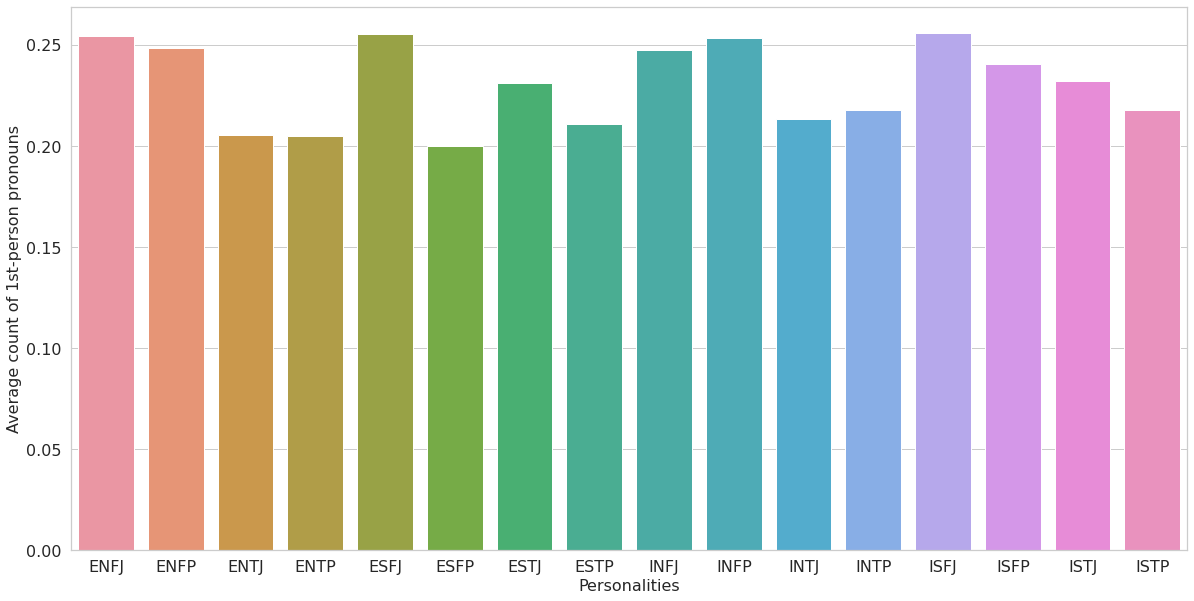

In [211]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_1st.index,y=df_1st['1st_pron_count'])
plt.ylabel('Average count of 1st-person pronouns', fontsize=16)
plt.xlabel('Personalities', fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)

In [212]:
df_2nd = df.groupby(['type'])['2nd_pron_count'].sum()/df.groupby(['type'])['org_comment_count'].sum()
df_2nd = df_2nd.to_frame('2nd_pron_count')

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

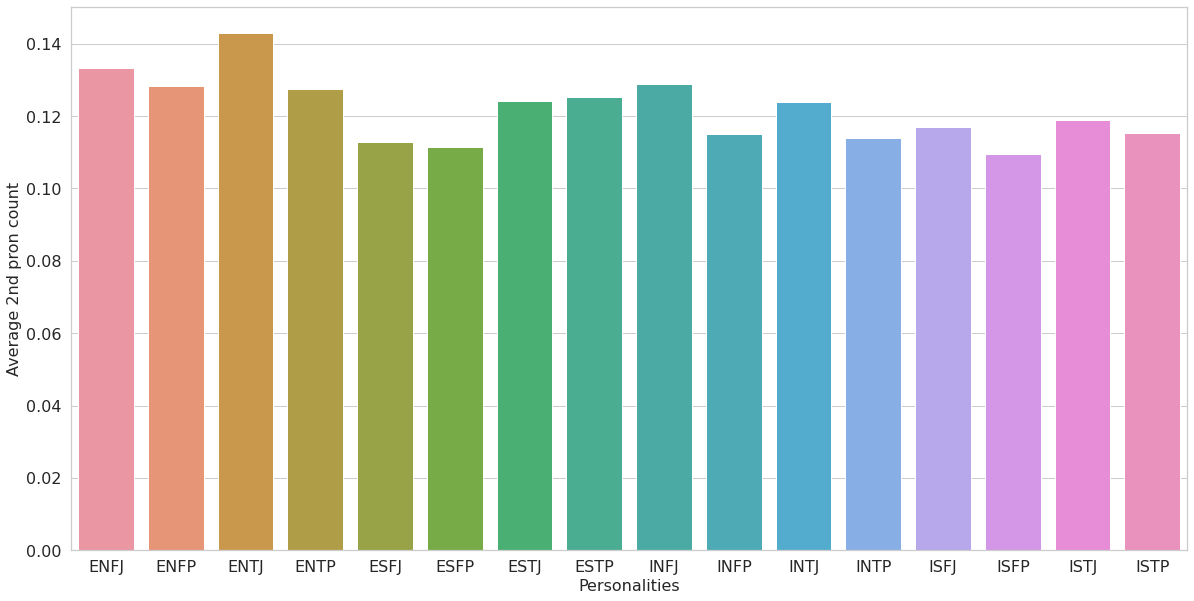

In [213]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_2nd.index,y=df_2nd['2nd_pron_count'])
plt.ylabel('Average 2nd pron count', fontsize=16)
plt.xlabel('Personalities', fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)

In [214]:
df_3rd = df.groupby(['type'])['3rd_pron_count'].sum()/df.groupby(['type'])['org_comment_count'].sum()
df_3rd = df_3rd.to_frame('3rd_pron_count')

<AxesSubplot:xlabel='type', ylabel='3rd_pron_count'>

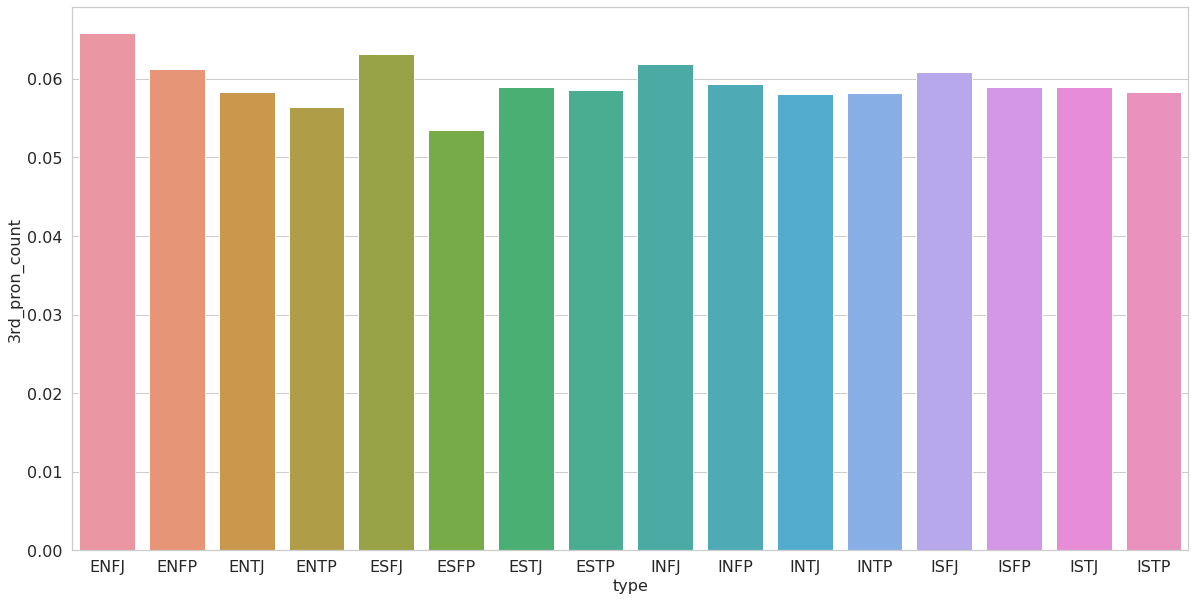

In [215]:
plt.figure(figsize=(20,10))
plt.ylabel('Average 3rd pron count', fontsize=16)
plt.xlabel('Personality Types', fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
sns.barplot(x=df_3rd.index,y=df_3rd['3rd_pron_count'])

In [216]:
def subtype_plot(df,vs_func):
    pron_type = ['1st_pron','2nd_pron','3rd_pron']
    frames = []
    for pron in pron_type:
        df_sub=df.groupby(df['type'].apply(vs_func))[pron+'_count'].sum()\
        /df.groupby(df['type'].apply(vs_func))['org_comment_count'].sum()

        df_sub = pd.DataFrame({'Personality': df_sub.index, 'Type of pronouns':pron,'Average count':df_sub.values})
        frames.append(df_sub)
    result = pd.concat(frames)
    sns.barplot(x='Type of pronouns', y='Average count', hue='Personality', data=result,palette = 'pastel')

## Comparison between average pronouns count for the given pair of sub-personality

In [217]:
E_vs_I = lambda x: 'Extraversion' if x[0] == 'E' else 'Introversion'
N_vs_S = lambda x: 'Intuition' if x[1] =='N' else 'Sensing'
T_vs_F = lambda x: 'Thinking' if x[2] == 'T' else 'Feeling'
J_vs_P = lambda x: 'Judging' if x[3] == 'J' else 'Perceving'

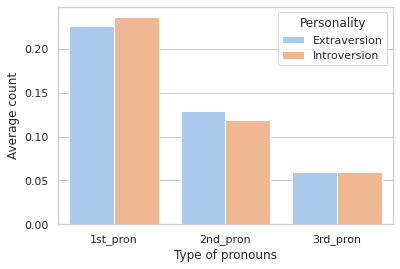

In [218]:
subtype_plot(df,E_vs_I)

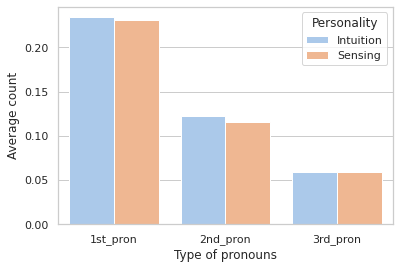

In [219]:
subtype_plot(df,N_vs_S)

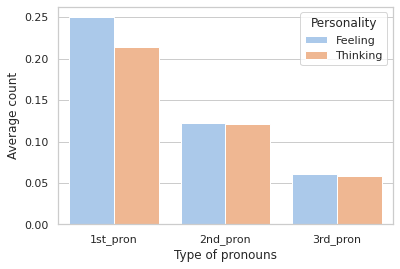

In [220]:
subtype_plot(df,T_vs_F)

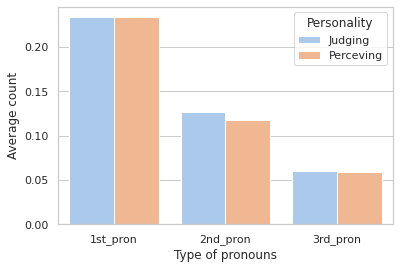

In [221]:
subtype_plot(df,J_vs_P)

In [222]:
def pie_chart(df,name,ax):
    data = df.loc[name].values
    ingredients = df.loc[name].index
    wedges, texts, autotexts = ax.pie(data,autopct='%1.1f%%',
                                      textprops=dict(color="w"),pctdistance=0.6,normalize=True
                                      )
    ax.set_title(name,size=16)

# Pie charts

In [223]:
all_count = pd.concat([df_1st,df_2nd,df_3rd],axis=1)
all_person_type = df.type.unique()

## Separated

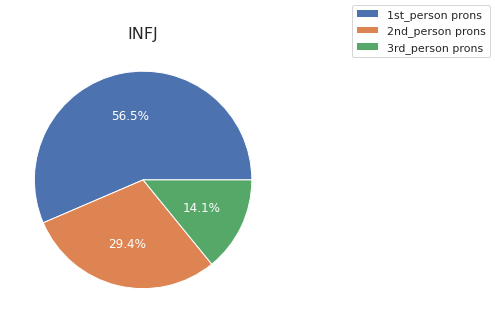

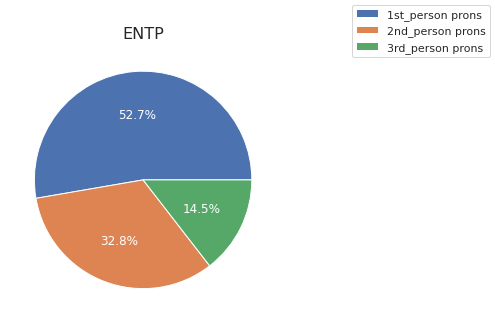

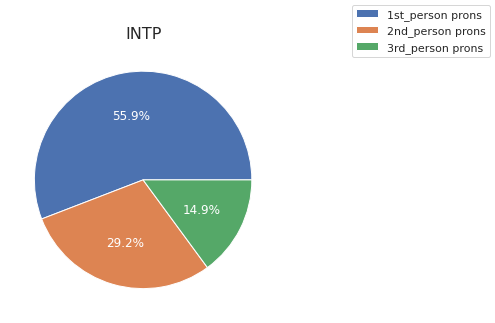

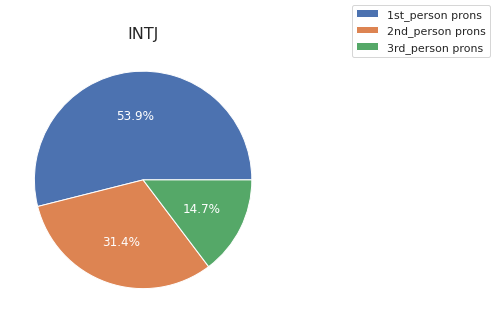

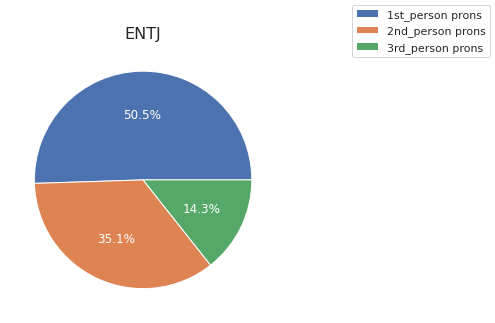

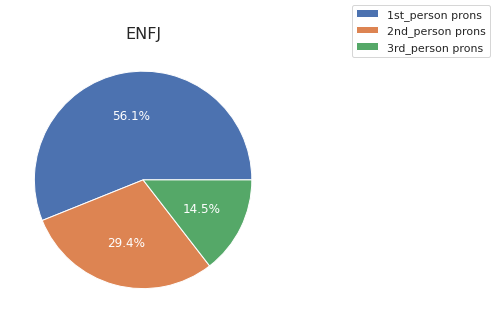

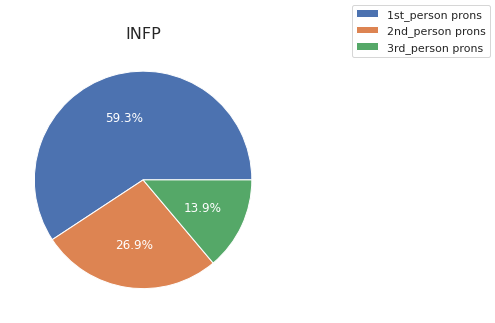

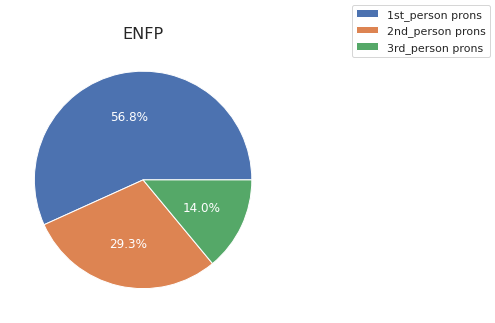

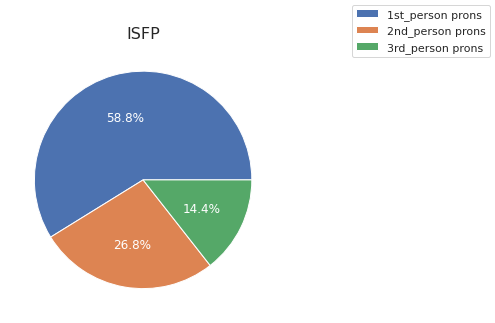

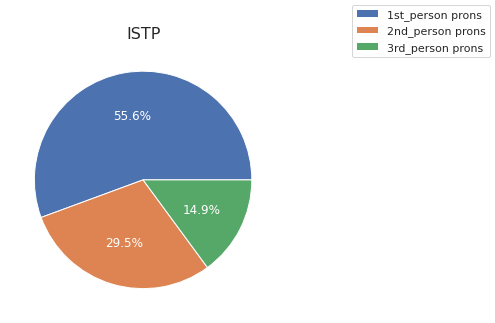

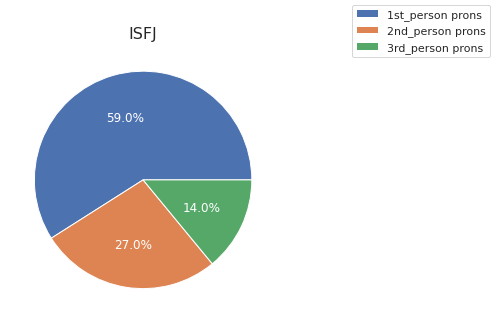

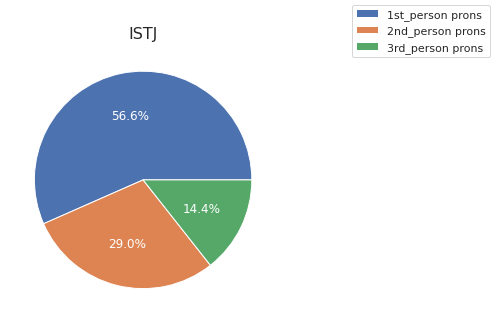

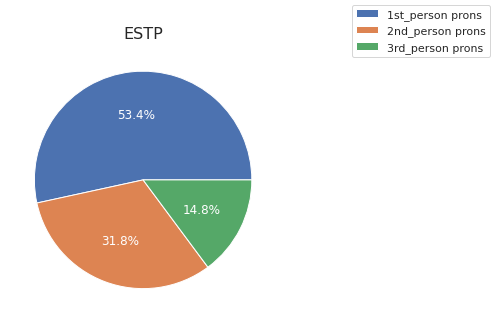

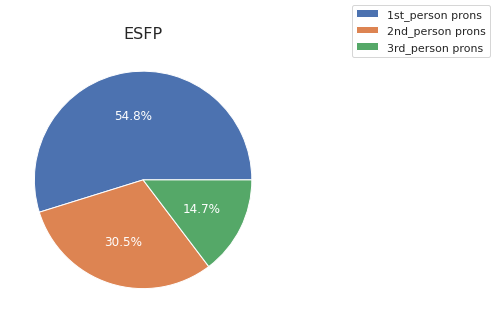

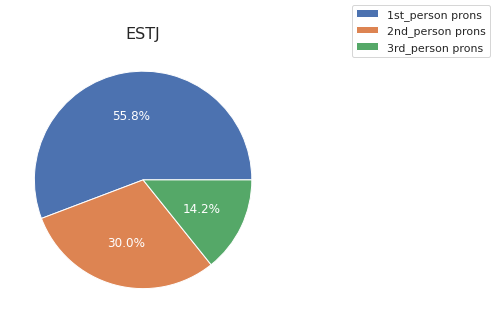

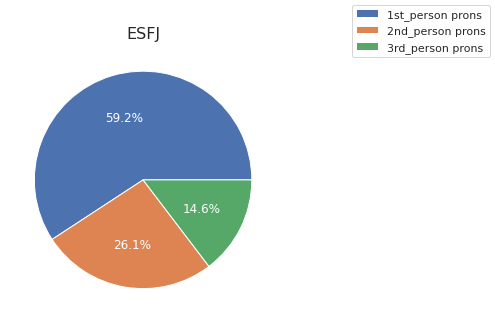

In [224]:
for idx in range(16):
    fig,ax = plt.subplots(figsize=(10, 5))
    name = all_person_type[idx]
    pie_chart(all_count,name,ax)
    fig.legend(['1st_person prons','2nd_person prons','3rd_person prons'])

## Combined

Text(0.5, 0.98, 'Percentage of different pronouns for each personality')

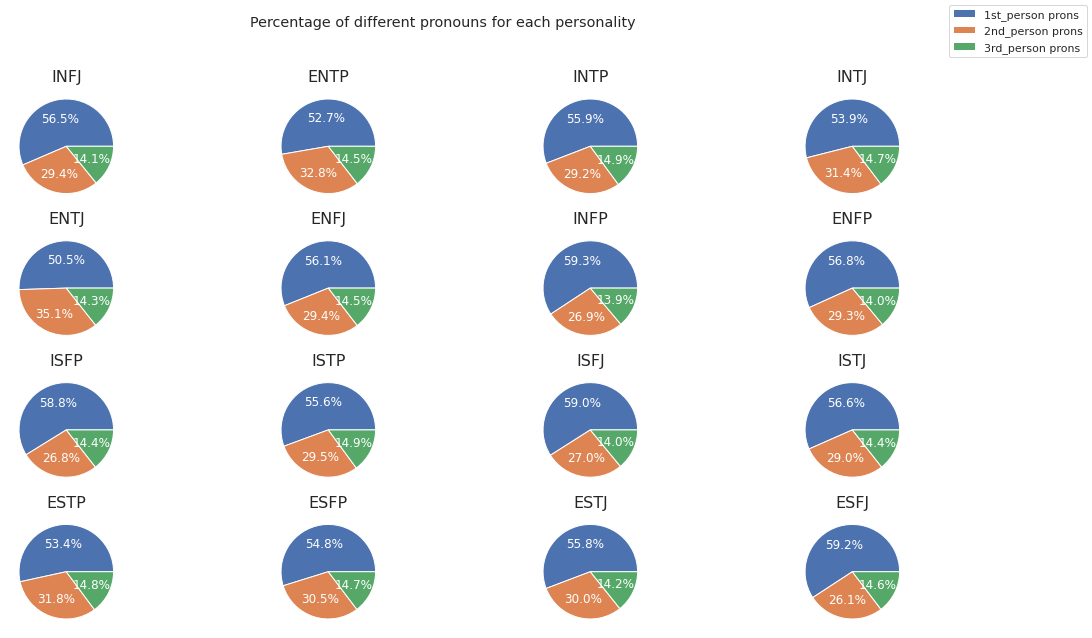

In [225]:
fig,axes = plt.subplots(4,4, figsize=(18, 10))
for i,ax in enumerate(axes.flat):
    name = all_person_type[i]
    pie_chart(all_count,name,ax)
fig.legend(['1st_person prons','2nd_person prons','3rd_person prons'])
fig.suptitle('Percentage of different pronouns for each personality')